In [520]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import warnings
warnings.filterwarnings('ignore')

In [521]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [523]:
## Strip whitespace, refactor date and remove the '$' and ',' from income ##
df.columns = df.columns.str.strip()
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['Income'] = df['Income'].str.replace('$','').str.replace(',','').astype(float)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [524]:
## Lets print out some initial data ##
print(f"Education Status:\n{df['Education'].value_counts()}")
print(f"Married Status:\n{df['Marital_Status'].value_counts()}")

Education Status:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Married Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [525]:
## 2n -> Masters and (Divorced, Widow, Alone, Yolo, Absurd) -> Single ##
df['Education'] = df['Education'].str.replace('2n Cycle','Master')
df['Education'] = df['Education'].str.replace('Graduation','Undergraduate')
for x in ['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd']:
    df['Marital_Status'] = df['Marital_Status'].str.replace(x,'Single')

## Lets total some numbers for number of children and their ages, along with spending ##
df['Age'] = datetime.datetime.now().year - df['Year_Birth']
df['Dependents'] = df['Kidhome'] + df['Teenhome']
df['TotalSpending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

## Check to make sure new columns are in ##
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Dependents',
       'TotalSpending'],
      dtype='object')

In [526]:
## check to make sure all changes went through ##
print(f"Education Status:\n{df['Education'].value_counts()}")
print(f"Married Status:\n{df['Marital_Status'].value_counts()}")

Education Status:
Education
Undergraduate    1127
Master            573
PhD               486
Basic              54
Name: count, dtype: int64
Married Status:
Marital_Status
Married     864
Single      796
Together    580
Name: count, dtype: int64


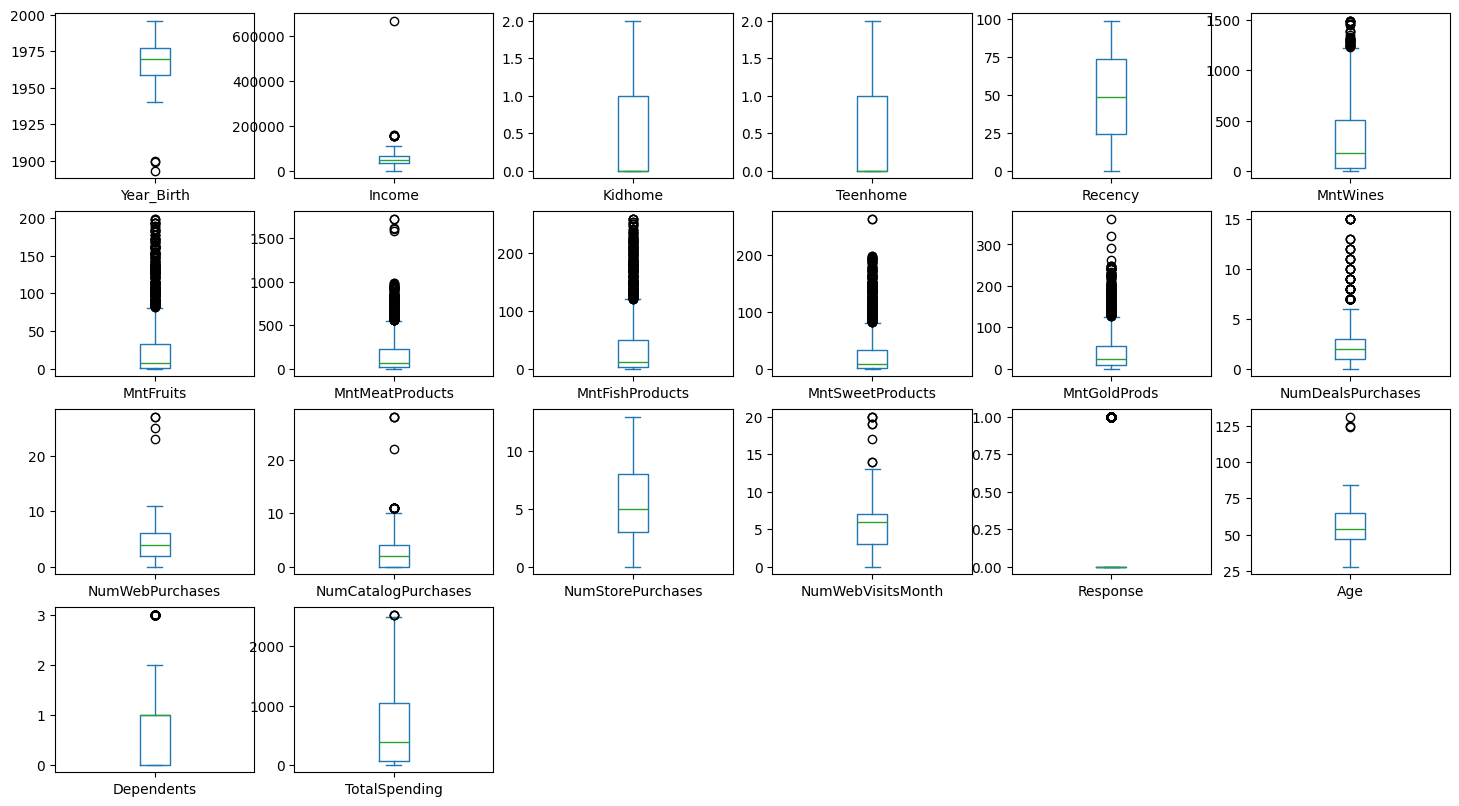

In [527]:
## remove some frames ##
dfd = df.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Complain'], axis=1)
## format the rest to show up in box plots ##
num_cols = dfd.select_dtypes(include=['number']).columns
df[num_cols].plot(subplots=True, layout=(6,6), kind='box', figsize=(18,15))
plt.show()

<Axes: >

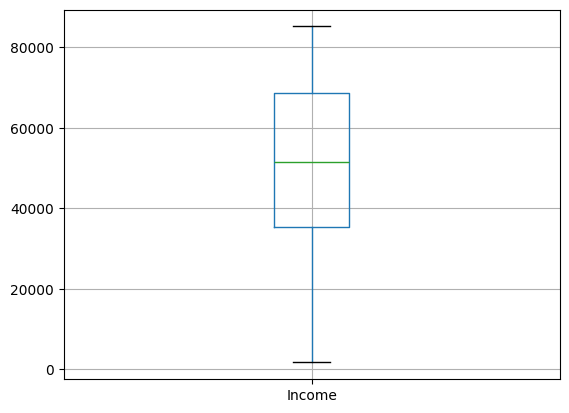

In [528]:
## Remove outliers from Income ##
Q1 = df['Income'].quantile(.25)
Q2 = df['Income'].quantile(.75)
IQR = Q2 - Q1
ILB = Q1 - 1.5*IQR
IUB = Q1 + 1.5*IQR
df['Income'].mask(df['Income'] > IUB, IUB, inplace=True)
df.boxplot('Income')

<Axes: >

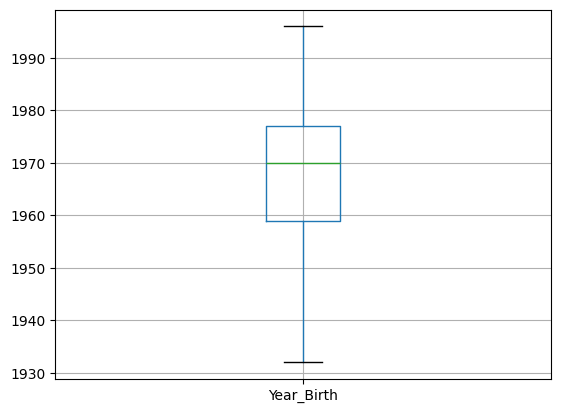

In [529]:
## Remove outliers from Year_Birth ##
Q1 = df['Year_Birth'].quantile(.25)
Q2 = df['Year_Birth'].quantile(.75)
YBQR = Q2 - Q1
YBLB = Q1 - 1.5*YBQR
YBUB = Q1 + 1.5*IQR
df['Year_Birth'].mask(df['Year_Birth'] < YBLB, YBLB, inplace=True)
df.boxplot('Year_Birth')

In [530]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Age                     0
Dependents              0
TotalSpending           0
dtype: int64

In [531]:
## 24 Incomes were null inputs, lets try to make an educated guess as to what they were ##
dfc = df[["Education", 'Marital_Status']].value_counts().groupby(["Education", "Marital_Status"]).sum().reset_index().sort_values(by=['Education','Marital_Status'], ascending=False)
dfc = (dfc.pivot(index='Education', columns='Marital_Status', values='count'))
dfc

Marital_Status,Married,Single,Together
Education,,,
Basic,20,20,14
Master,219,191,163
PhD,192,177,117
Undergraduate,433,408,286


In [532]:
temp = df.copy()  # set temp_data variable to avoid losing real data

for x in pd.unique(df.Education):
    for y in pd.unique(df.Marital_Status):
        filter = (temp.Education == x) & ( temp.Marital_Status == y)
        filtered_data = temp[filter]
        
        ## calc mean, round to cents, use for Income (specifically where Income is null) ##
        mean = np.round(np.mean(filtered_data['Income']), 2)
        
        filtered_data['Income'] = filtered_data['Income'].fillna(mean)
        print(f"'Income': {mean} is used for Education: {x} and Marriage Status: {y}")
        
        temp[filter] = filtered_data
    
df = temp.copy() 

'Income': 52163.32 is used for Education: Undergraduate and Marriage Status: Single
'Income': 50640.89 is used for Education: Undergraduate and Marriage Status: Married
'Income': 53194.21 is used for Education: Undergraduate and Marriage Status: Together
'Income': 53716.48 is used for Education: PhD and Marriage Status: Single
'Income': 56819.74 is used for Education: PhD and Marriage Status: Married
'Income': 55168.3 is used for Education: PhD and Marriage Status: Together
'Income': 52338.86 is used for Education: Master and Marriage Status: Single
'Income': 50535.23 is used for Education: Master and Marriage Status: Married
'Income': 48939.55 is used for Education: Master and Marriage Status: Together
'Income': 17998.35 is used for Education: Basic and Marriage Status: Single
'Income': 21960.5 is used for Education: Basic and Marriage Status: Married
'Income': 21240.07 is used for Education: Basic and Marriage Status: Together


In [533]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Age                    0
Dependents             0
TotalSpending          0
dtype: int64

In [534]:
## Remove unneeded information ##
df = df.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Complain'], axis=1)
temp = df
## Make sure they are gone ##
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Country', 'Age', 'Dependents', 'TotalSpending'],
      dtype='object')

In [535]:
df.Education.unique().tolist()

['Undergraduate', 'PhD', 'Master', 'Basic']

In [536]:
## Use ordinal encoding for education ##
data = pd.DataFrame({"Levels":df.Education.unique().tolist()})
encoder = OrdinalEncoder(categories=[df.Education.unique().tolist()])
df['Education1']=encoder.fit_transform(df[['Education']])
temp_cat = encoder.categories_ 
print(encoder.categories_)
df = df.drop(['Education', 'Country'], axis=1)
df.head()

[array(['Undergraduate', 'PhD', 'Master', 'Basic'], dtype=object)]


,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Dependents,TotalSpending,Education1
0,1970,Single,84835.0,0,0,2014-06-16,0,189,104,379,...,1,4,4,6,1,1,54,0,1190,0.0
1,1961,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,1,7,3,7,5,1,63,0,577,0.0
2,1958,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,1,3,2,5,2,0,66,1,251,0.0
3,1967,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,1,1,0,2,7,0,57,2,11,0.0
4,1989,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,2,3,1,2,7,1,35,1,91,0.0


In [537]:
## Use one hot encoding for for categorical data ##
df = pd.get_dummies(df, columns=[ "Marital_Status"])
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Response,Age,Dependents,TotalSpending,Education1,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
0,1970,84835.0,0,0,2014-06-16,0,189,104,379,111,...,6,1,1,54,0,1190,0.0,False,True,False
1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,...,7,5,1,63,0,577,0.0,False,True,False
2,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,...,5,2,0,66,1,251,0.0,True,False,False
3,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,...,2,7,0,57,2,11,0.0,False,False,True
4,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,...,2,7,1,35,1,91,0.0,False,True,False


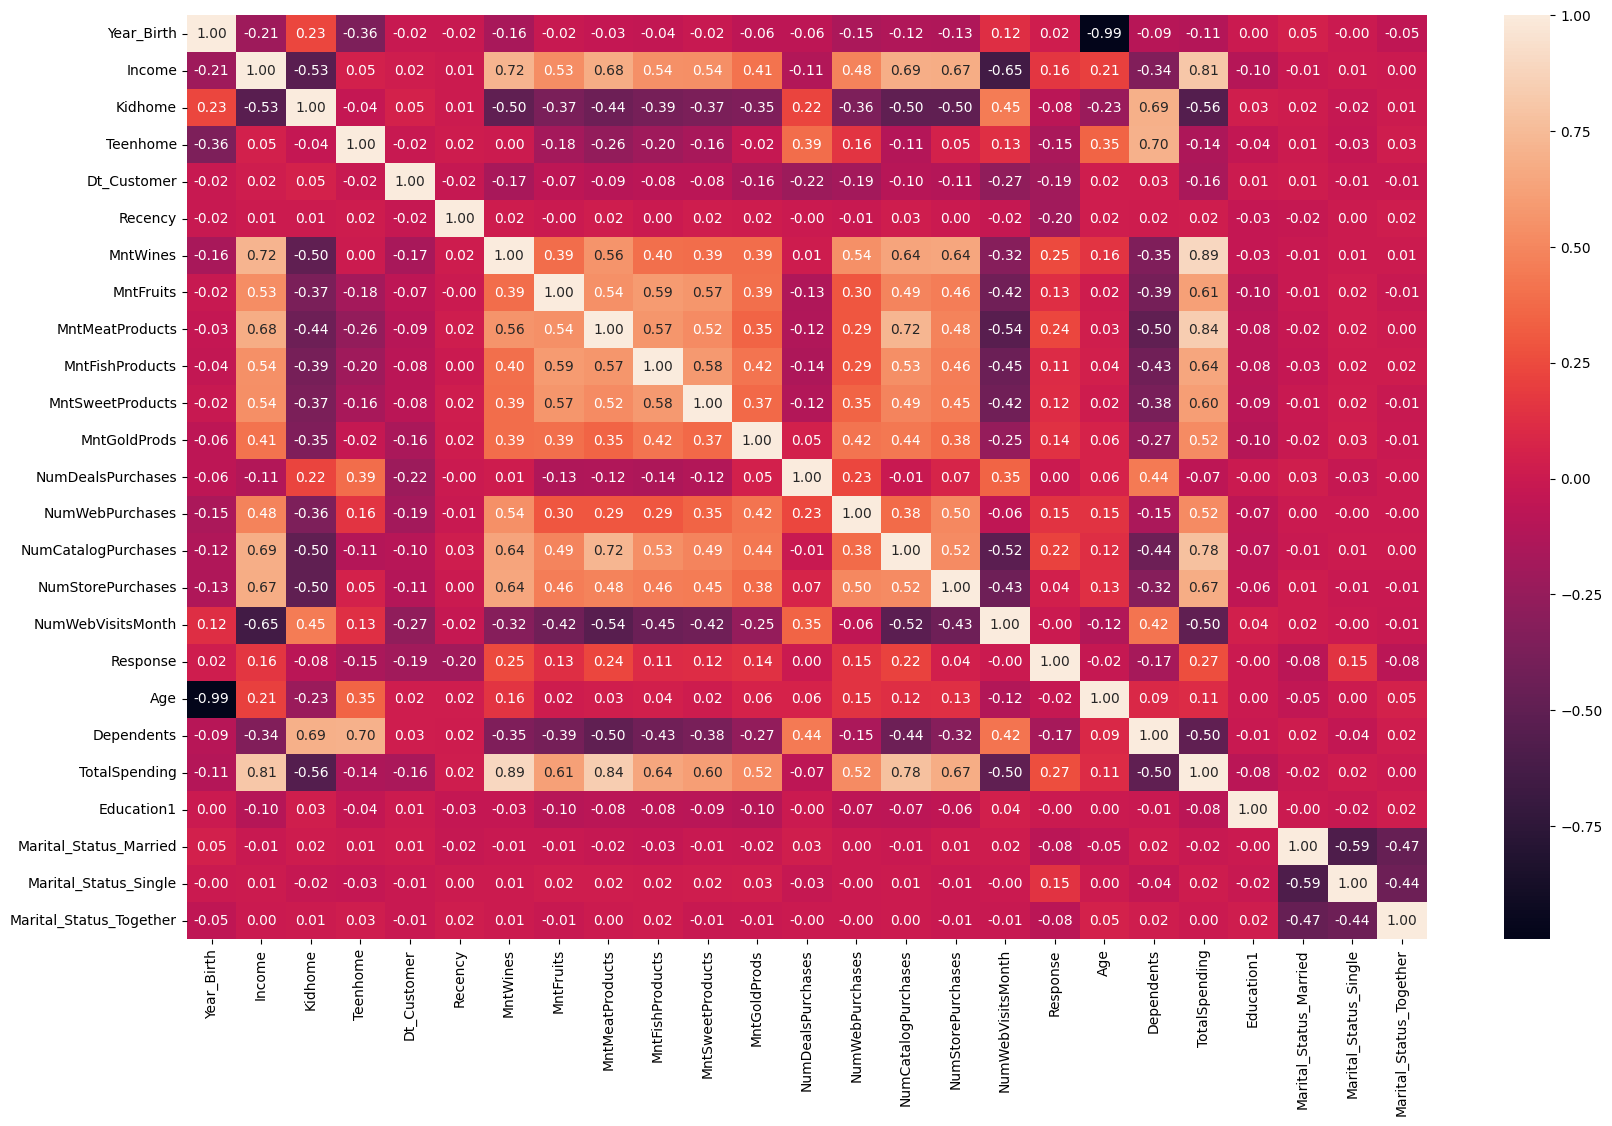

In [538]:
corr = df.corr()
plt.figure(figsize=(20,12))
sb.heatmap(corr, annot=True,fmt='.2f')
plt.show()

In [539]:
df.corr()['Response'].sort_values(ascending=False)

Response                   1.000000
TotalSpending              0.265298
MntWines                   0.247254
MntMeatProducts            0.236335
NumCatalogPurchases        0.220810
Income                     0.161375
Marital_Status_Single      0.150075
NumWebPurchases            0.148730
MntGoldProds               0.139850
MntFruits                  0.125289
MntSweetProducts           0.117372
MntFishProducts            0.111331
NumStorePurchases          0.039363
Year_Birth                 0.020058
NumDealsPurchases          0.002238
Education1                -0.003467
NumWebVisitsMonth         -0.003987
Age                       -0.021325
Marital_Status_Together   -0.075770
Marital_Status_Married    -0.079378
Kidhome                   -0.080008
Teenhome                  -0.154446
Dependents                -0.169163
Dt_Customer               -0.194481
Recency                   -0.198437
Name: Response, dtype: float64

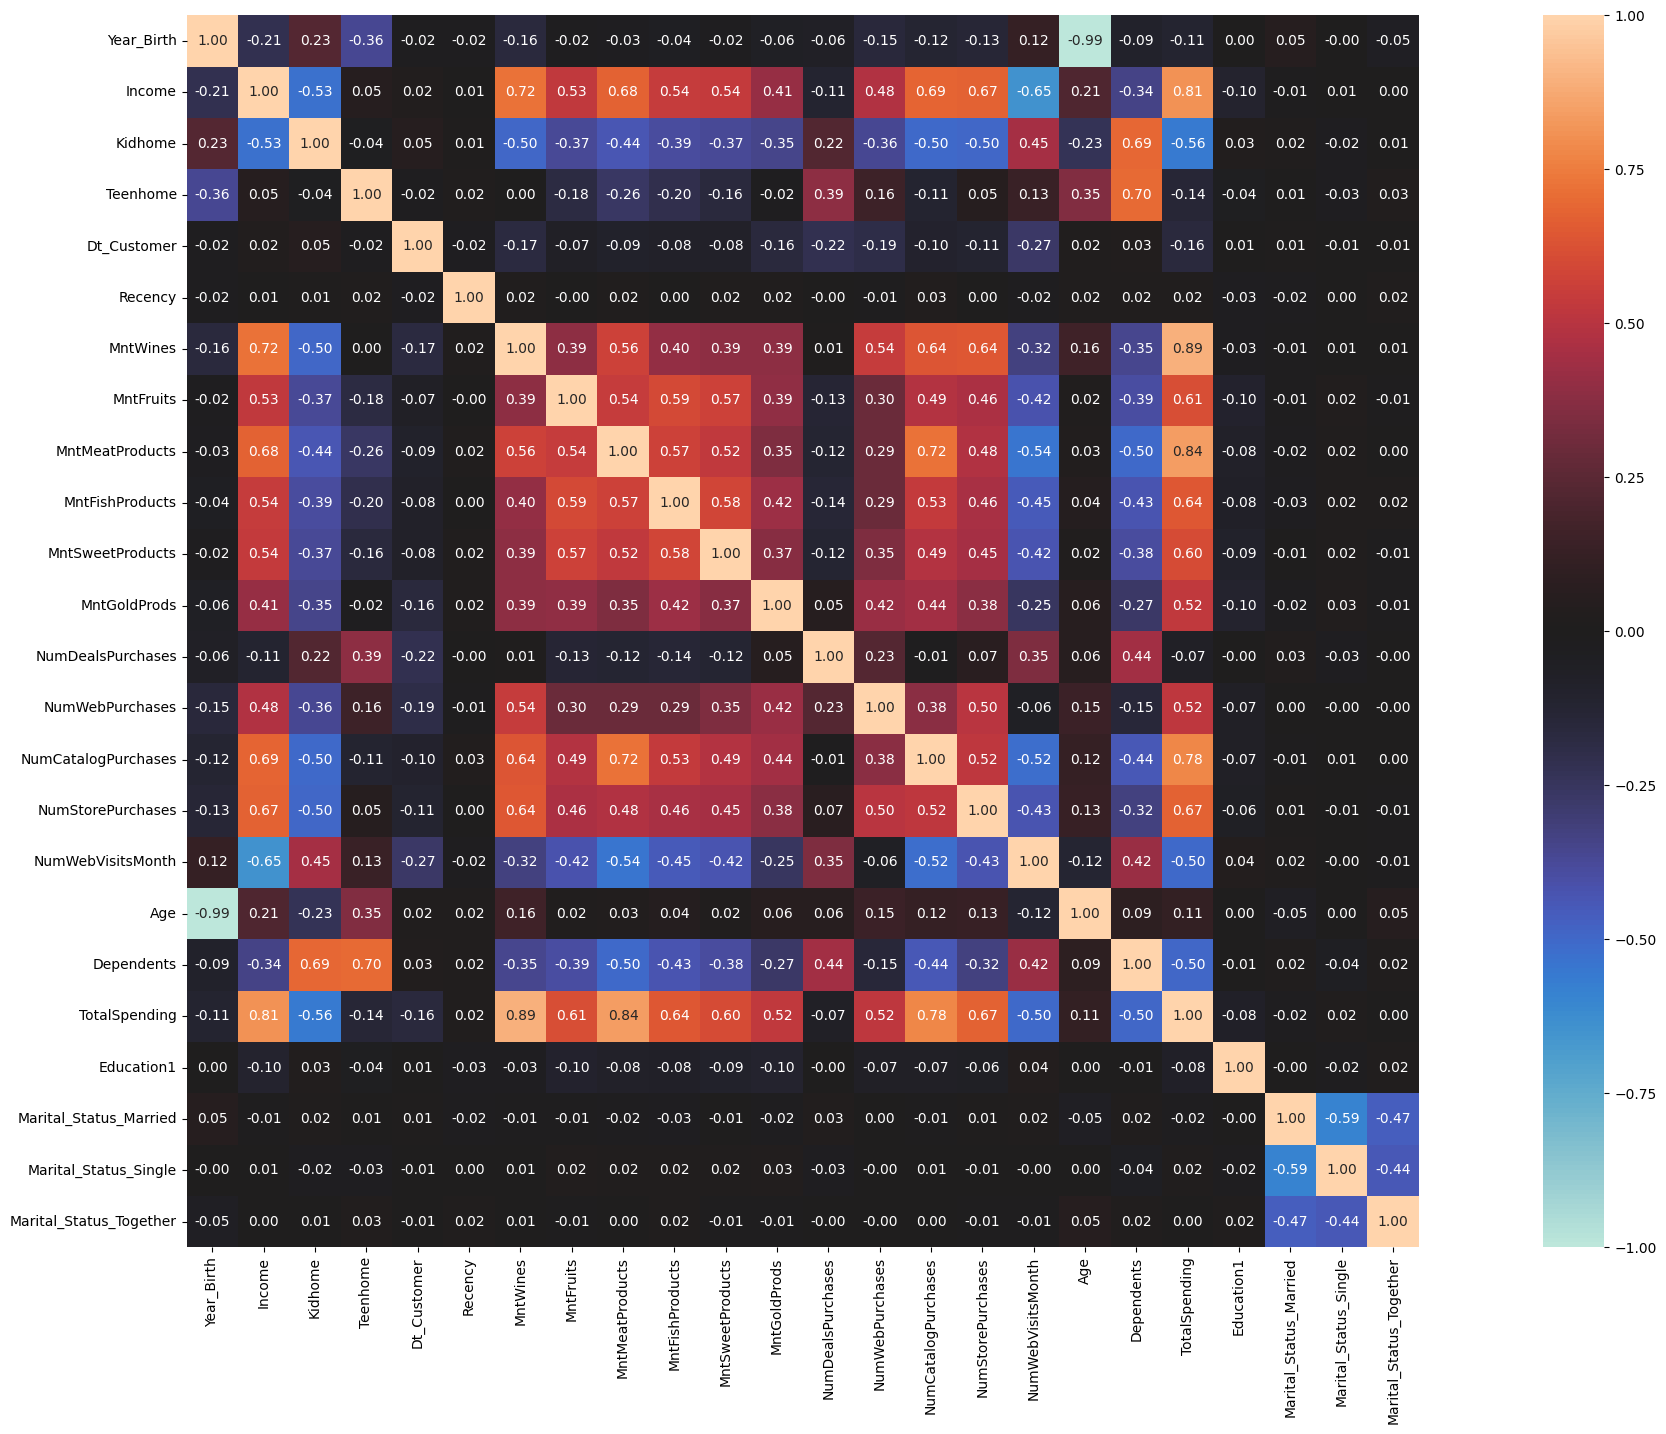

In [540]:
newdf = df.drop('Response', axis = 1)
complete_correlation = associations(newdf, figsize = (32, 16))

In [541]:
## reset and add countries and education back in ##
df = temp

## Classify Age groups
dfa=df[['Age','NumWebPurchases','NumStorePurchases']]

##Removing under 25 apparently we have noone that young spending money... Lucky them
#df_age.loc[(df_age['Age'] <= 25) , 'Age_Group'] = 'Young'
dfa.loc[(dfa['Age']  > 50) , 'Age_Group'] = 'Old'
dfa.loc[(dfa['Age']  > 25) & (dfa['Age'] <= 50) , 'Age_Group'] = 'Middle'

dfa.head()

,Age,NumWebPurchases,NumStorePurchases,Age_Group
0,54,4,6,Old
1,63,7,7,Old
2,66,3,5,Old
3,57,1,2,Old
4,35,3,2,Middle


In [542]:
## Breakdown where money is spent by age ##
dfa_plot=dfa[["Age_Group", 'NumWebPurchases','NumStorePurchases']].groupby(["Age_Group"]).sum() # Age_Group as an index for plotting .reset_index() 
dfa_plot.head()

,NumWebPurchases,NumStorePurchases
Age_Group,,
Middle,3095,4559
Old,6055,8411


<Axes: xlabel='Age_Group'>

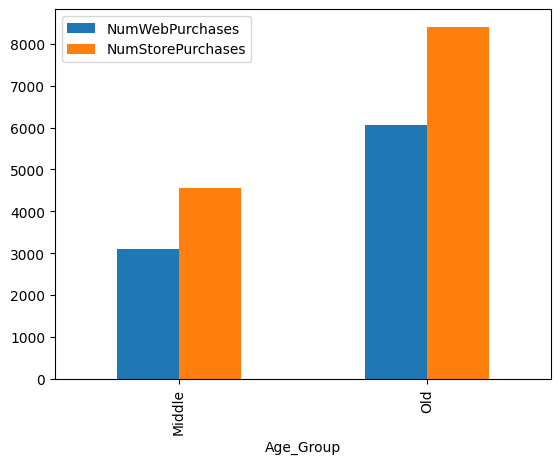

In [543]:
dfa_plot.plot.bar()

In [544]:
## Breakdown where money is when you have kids ##
dfkids=df[['Dependents','NumWebPurchases','NumStorePurchases']]
dfkids_plot= dfkids.groupby(["Dependents"]).sum() #.reset_index() 
dfkids_plot.head()

,NumWebPurchases,NumStorePurchases
Dependents,,
0,2803,4635
1,4834,6310
2,1361,1815
3,152,210


<Axes: xlabel='Dependents'>

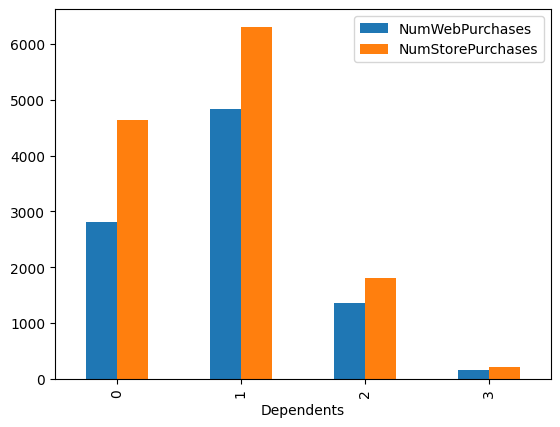

In [545]:
dfkids_plot.plot.bar()

([<matplotlib.patches.Wedge at 0x23311d42290>,
 [Text(0.9698058573993448, 0.5191113550616302, 'Deals'),
  Text(-0.29933747437362795, 1.0584881087832863, 'Online'),
  Text(-1.090577484984908, -0.14366888752960116, 'Catalog'),
  Text(0.3739290163314566, -1.0344936397800566, 'Instore')])

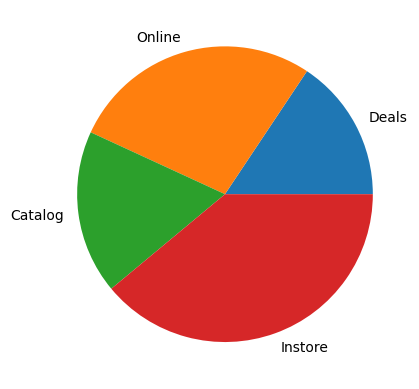

In [546]:
## Breakdown where money is spent as a percentage of all sales ##
num  = [df.NumDealsPurchases.sum(),
        df.NumWebPurchases.sum(),
        df.NumCatalogPurchases.sum(),
        df.NumStorePurchases.sum()]
opts = ['Deals','Online','Catalog','Instore']

fig, ax = plt.subplots()
ax.pie(num, labels=opts)

In [547]:
## Look at total sales per country ##
tpurchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Country']]
tpurchases['TotalPurchases'] = tpurchases['NumDealsPurchases'] + tpurchases['NumWebPurchases'] + tpurchases['NumCatalogPurchases'] + tpurchases['NumStorePurchases']
avgCountry = tpurchases.groupby('Country').agg(Total_Purchases = ('TotalPurchases', 'sum'))
avgCountry['Total_Customers'] = tpurchases['Country'].value_counts()
avgCountry['Purchases_Per_Customer'] = np.floor(avgCountry['Total_Purchases'] / avgCountry['Total_Customers'])
avgCountry.assign(country = avgCountry.index.get_level_values('Country'))
avgCountry.reset_index(inplace = True)
avgCountry = avgCountry.sort_values(by = 'Total_Purchases', ascending = False)
avgCountry.head()

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
6,SP,16052,1095,14.0
5,SA,5117,337,15.0
1,CA,4101,268,15.0
0,AUS,2314,160,14.0
3,IND,2099,148,14.0


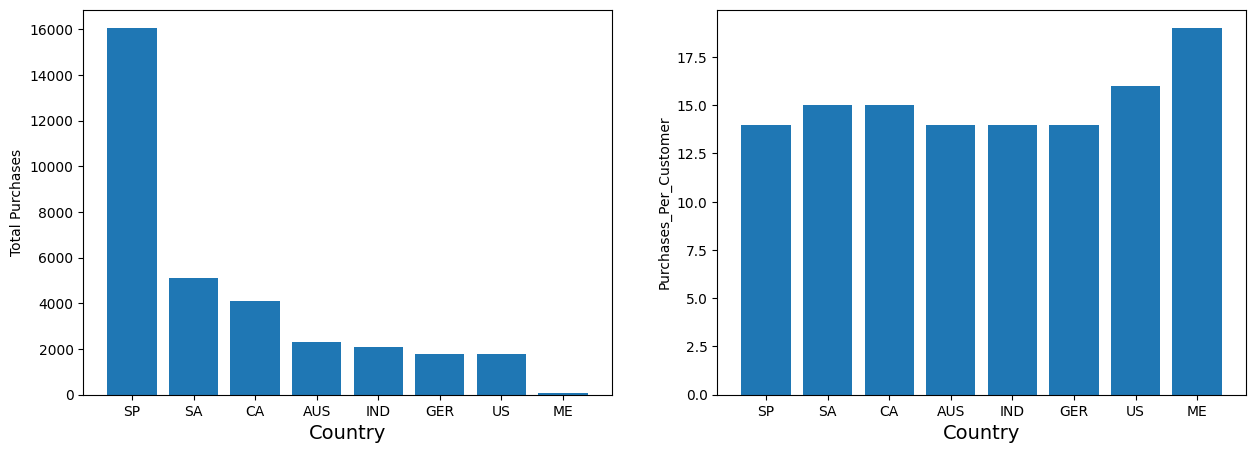

In [550]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(x = avgCountry['Country'], 
        height = avgCountry['Total_Purchases'])
ax1.set_xlabel('Country', fontsize=14)
ax1.set_ylabel('Total Purchases', fontsize='medium') 

ax2.bar(x = avgCountry['Country'],
       height = avgCountry['Purchases_Per_Customer'])
ax2.set_xlabel('Country', fontsize=14)
ax2.set_ylabel('Purchases_Per_Customer', fontsize='medium') 

plt.show()

Small write up for what has been done, the data was imported and sorted outliers were removed based on age and income. There were 24 inputs for incomes that were NaN so those were filled in using a mean calculation and then the different hypothesis' were looked shown above
1. Older people are not as tech-savvy and probably prefer shopping in-store: 
    It seems older people have more instore than online purchases but they also have more purchases than their Middle age counter parts.
2. Customers with kids probably have less time to visit a store and would prefer to shop online: 
    This is not supported by the data, parents across the board purchased more instore than they did online, but it is noticable that after 1 child number of purchases dropped dramatically.
3. Other distribution channels may cannibalize sales at the store:
    Even though there were other methods of purchase the Pie Graph shown still showed that Instore purchases made up the majority of purchases made.
4. Does the US fare significantly better than the rest of the world in terms of total purchases